In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as npov
import matplotlib
sns.set_style("darkgrid")

# 1. Read Entropie files 

In [2]:
iron=pd.read_table("/home/val/src/metagenome_Pfam_score/biogeochemical_cycles/iron/entropies.tab",index_col=0)
sulfur=pd.read_table("/home/val/src/metagenome_Pfam_score/biogeochemical_cycles/sulfur/entropies.tab",index_col=0)
methane= pd.read_table("/home/val/src/metagenome_Pfam_score/biogeochemical_cycles/carbon/entropies.tab",index_col=0)
oxygen= pd.read_table("/home/val/src/metagenome_Pfam_score/biogeochemical_cycles/oxygen/entropies.tab",index_col=0)
nitrogen=pd.read_table("/home/val/src/metagenome_Pfam_score/biogeochemical_cycles/nitrogen/entropies.tab",index_col=0)

# 2. Compute Maximum Theorethical Scores

In [32]:
iron_max=iron[iron>0].sum()
sulfur_max=sulfur[sulfur>0].sum()
methane_max=methane[methane>0].sum()
oxygen_max=oxygen[oxygen>0].sum()
nitrogen_max=nitrogen[nitrogen>0].sum()

# 3. Generate dataframes

In [96]:
ironmax= iron_max.to_frame()
ironmax.columns=['iron']
sulfurmax=sulfur_max.to_frame()
sulfurmax.columns=['sulfur']
methanemax=methane_max.to_frame()
methanemax.columns=['methane']
oxygenmax=oxygen_max.to_frame()
oxygenmax.columns=['oxygen']
nitrogenmax=nitrogen_max.to_frame()
nitrogenmax.columns=['nitrogen']

# 4. Concatenate into a single dataframe

In [107]:
MTScycles=pd.concat([ironmax, sulfurmax,methanemax,oxygenmax,nitrogenmax], axis=1)
MTScycles

,iron,sulfur,methane,oxygen,nitrogen
real,10.464,16.018,85.332,10.703,22.079
30,8.843,13.676,84.503,10.438,20.642
60,9.567,16.818,85.347,11.253,22.148
100,10.676,15.566,85.221,9.965,21.430
150,10.316,15.848,84.810,10.152,21.379
200,9.832,15.887,84.765,10.463,21.938
250,10.215,16.031,85.057,10.387,21.853
300,10.284,15.929,84.942,10.569,21.968


# 5. Plot Maximum values per cycle 


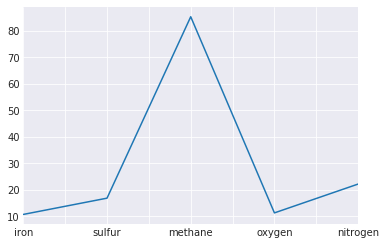

In [108]:
MTScycles.max().T.plot(kind='barh')

# 6. Running MEBS biogeochemical cycles 

In [3]:

gen=pd.read_table("Gen_dataset.tsv",index_col=0)

### Data location 
Todos los fasta de los metagenomas así como los scripts modificados para correr 
los ciclos biogeouimicos se corrieron en el siguiente directorio en baobab 


```
/data3/valerie/metagenomes/metagenome_Pfam_score
```

    
### Los fasta de los metagenomas:   
```
/data3/valerie/metagenomes/metagenome_Pfam_score/fasta.files
```

### Los fasta de los genomas:      

```
/home/valdeanda/azufre_project/new_2017/nr2016genomes/genomes_renamed/
```

Para correr los scripts solo se indica el directorio correspondiente 

### Parsear los datos de los genomas 

```
grep "Pfam entropy score" *.iron.score   | sed 's/_protein.faa.named.faa.out.hmmsearch.tab.iron.score:# Pfam entropy score:/\t/g'  > iron.scores.tsv
```
#### Iron 
```
scp valdeanda@161.111.227.14:/home/valdeanda/azufre_project/new_2017/nr2016genomes/genomes_renamed/iron.scores.tsv .
```

#### Oxygen 
```
grep "Pfam entropy score" *.oxygen.score | sed 's/_protein.faa.named.faa.out.hmmsearch.tab.oxygen.score:# /\t/g'   | sed 's/Pfam entropy score://g' > oxygen.tsv 
```

```
scp valdeanda@161.111.227.14:/home/valdeanda/azufre_project/new_2017/nr2016genomes/genomes_renamed/oxygen.tsv .
```

In [7]:
iron=pd.read_table("iron.scores.tsv",names=['Accesion','Iron'],index_col=1)
oxygen=pd.read_table("oxygen.tsv",names=['Accesion','Oxygen'],index_col=1)
oxygen.head()

,Accesion
Oxygen,
4.840,GCF_000005825.2_ASM582v2
4.046,GCF_000005845.2_ASM584v2
4.277,GCF_000006175.1_ASM617v2
4.399,GCF_000006605.1_ASM660v1
0.010,GCF_000006625.1_ASM662v1


In [28]:
#Tengo que hacer esta jalada hasta que no encuentre una pinche regex para cortarlo 
#oxygendf=oxygen['Accesion_cut'] = oxygen['Accesion'].str[:15].to_frame()
#irondf=iron['Accesion_cut'] = iron['Accesion'].str[:15].to_frame()
irondf=pd.read_table( "iron3.txt",index_col=0)
oxygendf=pd.read_table("oxygen.3.tsv",index_col=0)
irondf.head()
#oxygendf.reset_index()
#oxygendf.set_index("Accesion")
#irondf=irondf.reset_index()
#irondf.columns=('Iron','ID')
#irondf.to_csv("iron2,txt",sep="\t")



,Iron
ID,
GCF_000005825.2,3.581
GCF_000005845.2,5.658
GCF_000006175.1,0.658
GCF_000006605.1,2.262
GCF_000006625.1,0.126


In [29]:
oxygendf.head()

,Oxygen
ID,
GCF_000005825.2,4.840
GCF_000005845.2,4.046
GCF_000006175.1,4.277
GCF_000006605.1,4.399
GCF_000006625.1,0.010


In [30]:
#El accesion number está mal y en la tabla suplementaria del paper, por eso solo tenemos 
# que identificarlo por el id
gen.head()

,Species,SS,Kigdom,Phylum,Class,Order,Family,Genus,Guild,Category
ID,,,,,,,,,,
GCF_000024605.1,Ammonifex degensii KC4,"12,508",Bacteria,Firmicutes,Clostridia,Thermoanaerobacterales,Thermoanaerobacteraceae,Moorella group,SRB/SR,Suli
GCF_000025285.1,Archaeoglobus profundus DSM 5631,"12,024",Archaea,Euryarchaeota,Archaeoglobi,Archaeoglobales,Archaeoglobaceae,Archaeoglobus,SRB,Suli
GCF_000018425.1,Candidatus Desulforudis audaxviator MP104C,"11,972",Bacteria,Firmicutes,Clostridia,Clostridiales,Peptococcaceae,Candidatus Desulforudis,Sur,Sur
GCF_000020645.1,Pelodictyon phaeoclathratiforme BU-1,"11,836",Bacteria,Chlorobi,Chlorobia,Chlorobiales,Chlorobiaceae,Chlorobium/Pelodictyon group,GSB,Suli
GCF_000020545.1,Chlorobium phaeobacteroides BS1,"11,649",Bacteria,Chlorobi,Chlorobia,Chlorobiales,Chlorobiaceae,Chlorobium/Pelodictyon group,GSB,Suli


### Convertir a dataframe y agregar los nombres concatenar información con resultados SS 

In [31]:
concatMEBS=pd.concat([gen,irondf,oxygendf,], axis=1)
concatMEBS.columns

Index(['Species', 'SS', 'Kigdom ', 'Phylum ', 'Class ', 'Order ', 'Family ',
       'Genus ', 'Guild', 'Category', 'Iron', 'Oxygen'],
      dtype='object')

In [40]:
#Buscar el valor maximo
#irondf[['Iron']].max()
#Percentil 
np.percentile(concatMEBS[['Oxygen']],98)

8.66676

In [34]:
concatMEBS.max()

Species     secondary endosymbiont of Heteropsylla cubana
SS                                                  9,971
Kigdom                                           Bacteria
Phylum                                                  0
Class                                                   0
Order                                                   0
Family                                                  0
Genus                                                   0
Guild                                                 Sur
Category                                              Sur
Iron                                               10.171
Oxygen                                              9.774
dtype: object

In [42]:
concatMEBS.loc[concatMEBS['Oxygen'] >=9]

,Species,SS,Kigdom,Phylum,Class,Order,Family,Genus,Guild,Category,Iron,Oxygen
GCF_000010065.1,Synechococcus elongatus PCC 6301,"3,601",Bacteria,Cyanobacteria,Oscillatoriophycideae,Chroococcales,Synechococcus,0,NS,NS,3.749,9.252
GCF_000012505.1,Synechococcus sp. CC9902,"2,8",Bacteria,Cyanobacteria,Oscillatoriophycideae,Chroococcales,Synechococcus,0,NS,NS,3.280,9.353
GCF_000012625.1,Synechococcus sp. CC9605,"2,244",Bacteria,Cyanobacteria,Oscillatoriophycideae,Chroococcales,Synechococcus,0,NS,NS,3.529,9.389
GCF_000014585.1,Synechococcus sp. CC9311,"2,642",Bacteria,Cyanobacteria,Oscillatoriophycideae,Chroococcales,Synechococcus,0,NS,NS,4.291,9.353
GCF_000014825.1,Rhodopseudomonas palustris BisA53,"2,111",Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,Rhodopseudomonas,NS,NS,10.070,9.074
GCF_000022045.1,Cyanothece sp. PCC 7425,"3,796",Bacteria,Cyanobacteria,Oscillatoriophycideae,Chroococcales,Cyanothece,0,NS,NS,4.182,9.133
GCF_000063505.1,Synechococcus sp. WH 7803,"2,623",Bacteria,Cyanobacteria,Oscillatoriophycideae,Chroococcales,Synechococcus,0,NS,NS,3.647,9.358
GCF_000063525.1,Synechococcus sp. RCC307,"2,918",Bacteria,Cyanobacteria,Oscillatoriophycideae,Chroococcales,Synechococcus,0,NS,NS,3.460,9.353
GCF_000161795.2,Synechococcus sp. WH 8109,"2,551",Bacteria,Cyanobacteria,Oscillatoriophycideae,Chroococcales,Synechococcus,0,NS,NS,3.460,9.396
GCF_000214665.1,Methylomonas methanica MC09,"3,651",Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylomonas,NS,NS,5.625,9.122


In [166]:
#Verificar que bacterias están por arriba de ese percentil, es consistente? se tendria que hacer la curva 
#saldría muy bajita porlo que veo a ojo 
irondf.loc[irondf['Iron'] >= 10.171]

,Iron,Species,SS,Kigdom,Phylum,Class,Order,Family,Genus,Guild,Category
GCF_000009985.1,10.171,Magnetospirillum magneticum AMB-1,"6,094",Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Rhodospirillaceae,Magnetospirillum,Sur,Sur
GCF_000024165.1,10.171,Candidatus Accumulibacter phosphatis clade IIA...,"3,884",Bacteria,Proteobacteria,Betaproteobacteria,Candidatus Accumulibacter,0,0,NS,NS


In [34]:

#No me cuadra que Rhizobium leguminosarum reduzca hierro....? 
#Revisando la based e datos Pfam de hierro si concuerda con los Pfams y los markers, 
#Sin embargo no me cuadra que estos dos tengan los valores más altos.. 

,Iron,ID,Species,SS,Kigdom,Phylum,Class,Order,Family,Genus,Guild,Category
GCF_000006765.1_ASM676v1,8.065,GCF_000012665.1,Desulfovibrio alaskensis G20,"11,5",Bacteria,Proteobacteria,Deltaproteobacteria,Desulfovibrionales,Desulfovibrionaceae,Desulfovibrio,SRB,Suli
GCF_000007985.2_ASM798v2,8.998,GCF_000224105.1,Mycoplasma putrefaciens KS1,"-1,035",Bacteria,Tenericutes,Mollicutes,Mycoplasmataceae,Mycoplasma,0,NS,NS
GCF_000009745.1_ASM974v1,9.692,GCF_001006045.1,Geoglobus ahangari,"7,947",Archaea,Euryarchaeota,Archaeoglobi,Archaeoglobales,Archaeoglobaceae,Geoglobus,Sur,Sur
GCF_000009985.1_ASM998v1,10.171,GCF_000517605.1,Rhizobium leguminosarum bv. trifolii WSM1689,"-1,483",Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Rhizobium/Agrobacterium group,NS,NS
GCF_000011805.1_ASM1180v1,8.041,GCF_000145295.1,Methanothermobacter marburgensis str. Marburg,"6,27",Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanothermobacter,Sur,Sur
GCF_000012325.1_ASM1232v1,8.081,GCF_000305935.1,Thermacetogenium phaeum DSM 12270,"6,077",Bacteria,Firmicutes,Clostridia,Thermoanaerobacterales,Thermoanaerobacteraceae,Thermacetogenium,Sur,Sur
GCF_000012425.1_ASM1242v1,10.100,GCF_000816105.1,Thermococcus guaymasensis DSM 11113,"6,017",Archaea,Euryarchaeota,Thermococci,Thermococcales,Thermococcaceae,Thermococcus,SR,Suli
GCF_000012805.1_ASM1280v1,8.672,GCF_000970265.1,Methanosarcina lacustris Z-7289,"5,93",Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosarcinaceae,Methanosarcina,Sur,Sur
GCF_000012925.1_ASM1292v1,9.187,GCF_000761215.1,Streptomyces glaucescens,"-1,518",Bacteria,Actinobacteria,Streptomycetales,Streptomycetaceae,Streptomyces,0,NS,NS
GCF_000013605.1_ASM1360v1,9.630,GCF_000007345.1,Methanosarcina acetivorans C2A,"5,753",Archaea,Euryarchaeota,Methanomicrobia,Methanosarcinales,Methanosarcinaceae,Methanosarcina,S-org,Suli


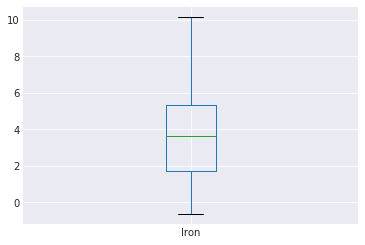

In [ ]:
 grep "Pfam entropy score" *.oxygen.score | sed 's/_protein.faa.named.faa.out.hmmsearch.tab.oxygen.score:# /\t/g'   | sed 's/Pfam entropy score://g'  
